In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
india_df = pd.read_csv("cnn_lstm_predictions_india.csv", parse_dates=['Date'])
ireland_df = pd.read_csv("cnn_lstm_predictions_ireland.csv", parse_dates=['Date'])
usa_df = pd.read_csv("cnn_lstm_predictions_usa.csv", parse_dates=['Date'])

In [9]:
india_df['Market'] = 'India'
ireland_df['Market'] = 'Ireland'
usa_df['Market'] = 'USA'

In [10]:
combined_df = pd.concat([india_df, ireland_df, usa_df], ignore_index=True)

In [6]:
print("Ireland:")
print(ireland_df[['Actual_Close', 'Predicted_Close']].describe())

print("\nUSA:")
print(usa_df[['Actual_Close', 'Predicted_Close']].describe())

Ireland:
       Actual_Close  Predicted_Close
count    284.000000       284.000000
mean   10074.481160     10083.277658
std      628.205211       541.350797
min     9148.209961      9317.846000
25%     9644.324951      9746.867875
50%     9813.979980      9878.815000
75%    10339.107666     10307.258750
max    11718.709961     11562.010000

USA:
       Actual_Close  Predicted_Close
count    284.000000       284.000000
mean    5704.755806      5677.812387
std      270.945722       245.041385
min     4982.770020      5091.515600
25%     5493.397461      5507.159625
50%     5712.445068      5702.404850
75%     5951.057617      5861.461350
max     6144.149902      6079.563000


In [7]:
print(ireland_df['Date'].min(), ireland_df['Date'].max())
print(usa_df['Date'].min(), usa_df['Date'].max())

2024-05-14 00:00:00 2025-06-24 00:00:00
2024-05-03 00:00:00 2025-06-23 00:00:00


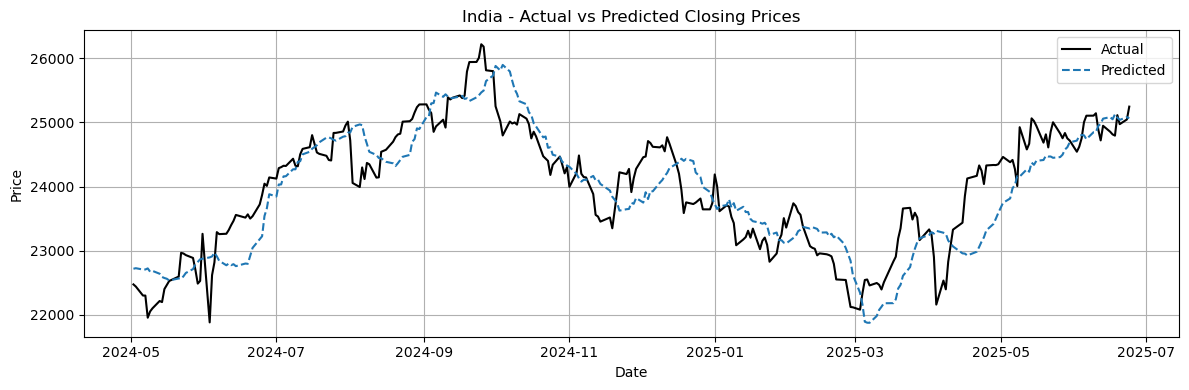

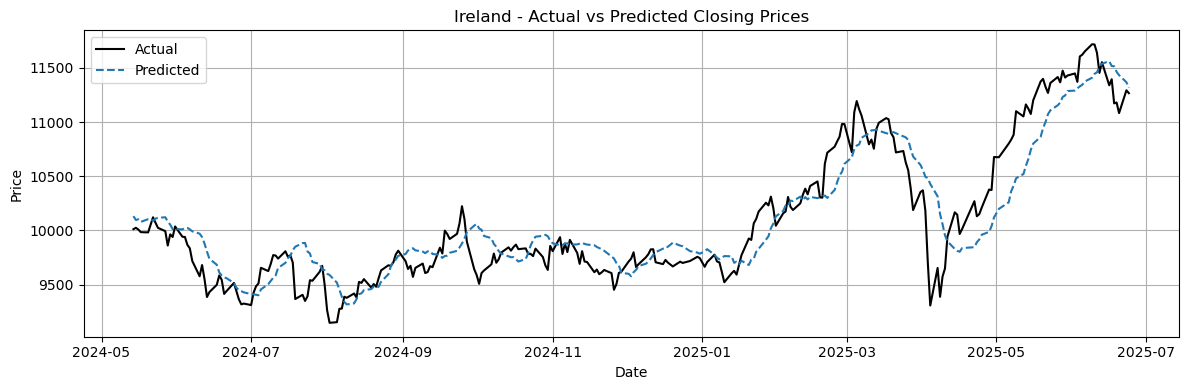

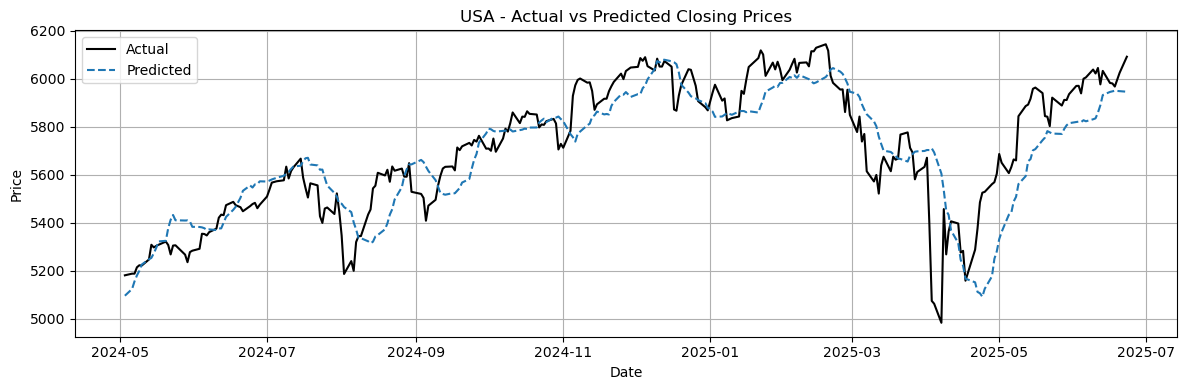

In [11]:
markets = ['India', 'Ireland', 'USA']
for market in markets:
    df = combined_df[combined_df['Market'] == market]

    plt.figure(figsize=(12, 4))
    plt.plot(df['Date'], df['Actual_Close'], label='Actual', color='black')
    plt.plot(df['Date'], df['Predicted_Close'], label='Predicted', linestyle='--')
    plt.title(f"{market} - Actual vs Predicted Closing Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

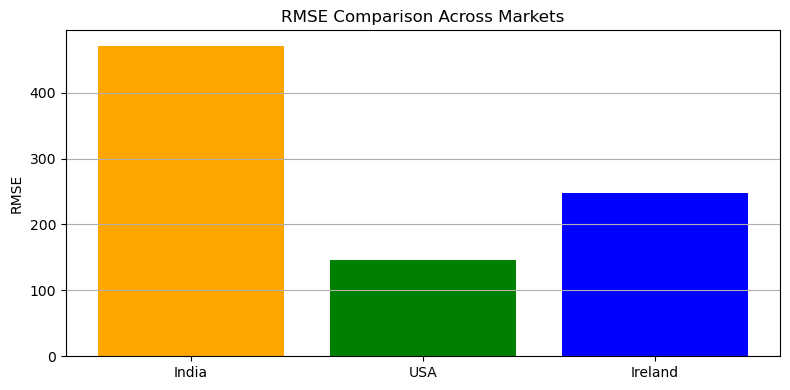

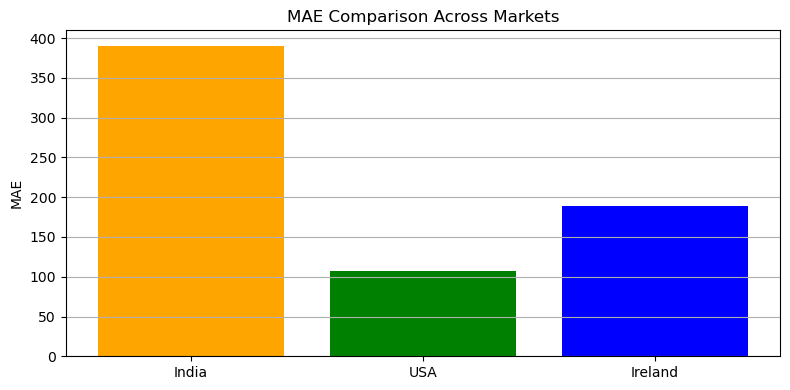

In [ ]:
rmse_metrics = {'India': 471.12, 'USA': 146.15, 'Ireland': 247.55}
mae_metrics = {'India': 390.21, 'USA': 107.48, 'Ireland': 189.38}

# RMSE Bar Chart
plt.figure(figsize=(8, 4))
plt.bar(rmse_metrics.keys(), rmse_metrics.values(), color=['orange', 'green', 'blue'])
plt.title("RMSE Comparison Across Markets")
plt.ylabel("RMSE")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# MAE Bar Chart
plt.figure(figsize=(8, 4))
plt.bar(mae_metrics.keys(), mae_metrics.values(), color=['orange', 'green', 'blue'])
plt.title("MAE Comparison Across Markets")
plt.ylabel("MAE")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

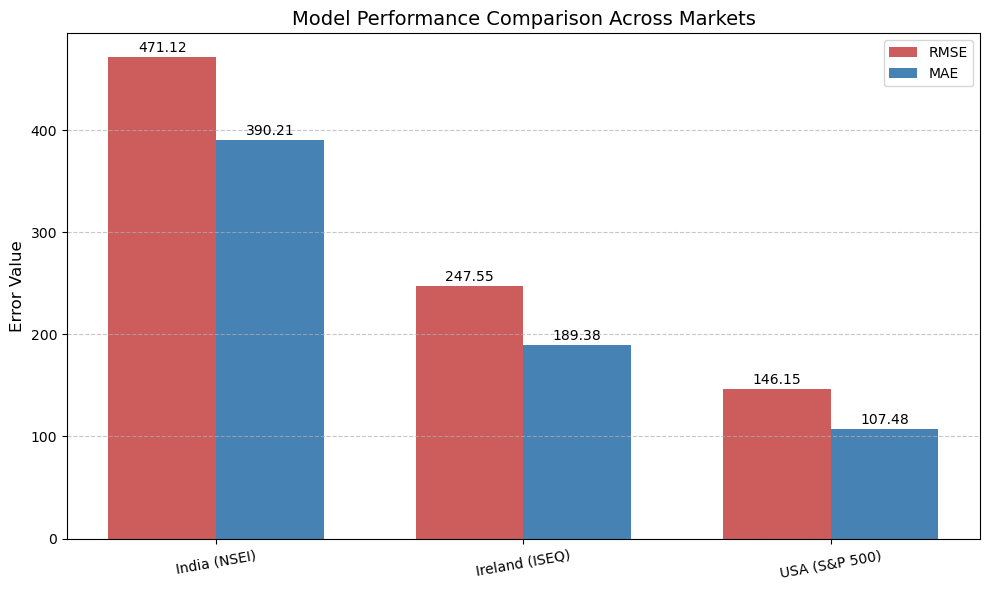

In [3]:
# Step 1: Define final evaluation results for each market
markets = ['India (NSEI)', 'Ireland (ISEQ)', 'USA (S&P 500)']
rmse = [471.12, 247.55, 146.15]
mae = [390.21, 189.38, 107.48]

# Step 2: Bar chart setup
x = np.arange(len(markets))  # label locations
width = 0.35  # width of each bar

# Step 3: Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, rmse, width, label='RMSE', color='indianred')
bar2 = ax.bar(x + width/2, mae, width, label='MAE', color='steelblue')

# Step 4: Labels and annotations
ax.set_title('Model Performance Comparison Across Markets', fontsize=14)
ax.set_ylabel('Error Value', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(markets, rotation=10)
ax.legend()

# Step 5: Annotate values on bars
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{yval:.2f}", ha='center', fontsize=10)

# Step 6: Style
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("rmse_mae_comparison_chart.png", dpi=300)
plt.show()
